In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths to CSV files by scale
scale_paths = {
    'Scale 1': 'results/power_s1.csv',
    'Scale 1.5': 'results/power_s1.5.csv',
    'Scale 2': 'results/power_s2.csv',
    'Scale 3': 'results/power_s3.csv'
}

# Groups for categorization
groups = {
    "Reporting": [84,45,98,63,91,57,25,90,65,55,85,16,36,75,22,47,21,54,61,62,15,4,18,48,60,59,82,83,70,19,30,29,97,24,27,39,35,34,79,3,78,10,6,80,17,43,38,32,87,94],
    "Ad-hoc": [1,12,58,26,40,31,23,42,20,71,95,28,72,76,99,89,67,77,52],
    "Iterative OLAP": [2,49,64,69,14,68,92,53,50,7,86,74,46,33,11,66,56,40,13,44],
    "Data Mining": [93,51,41,8,9,73,5,88,81,30,37]
}
# Colors for each group
colors = {
    "Reporting": 'blue',
    "Ad-hoc": 'green',
    "Iterative OLAP": 'orange',
    "Data Mining": 'red'
}

In [3]:
# Dictionary for storing results
all_data = {}
stats = {
    'Total Time': {},
    'Longest Time': {},
    'Smallest Time': {},
    'Mean Time': {}
}

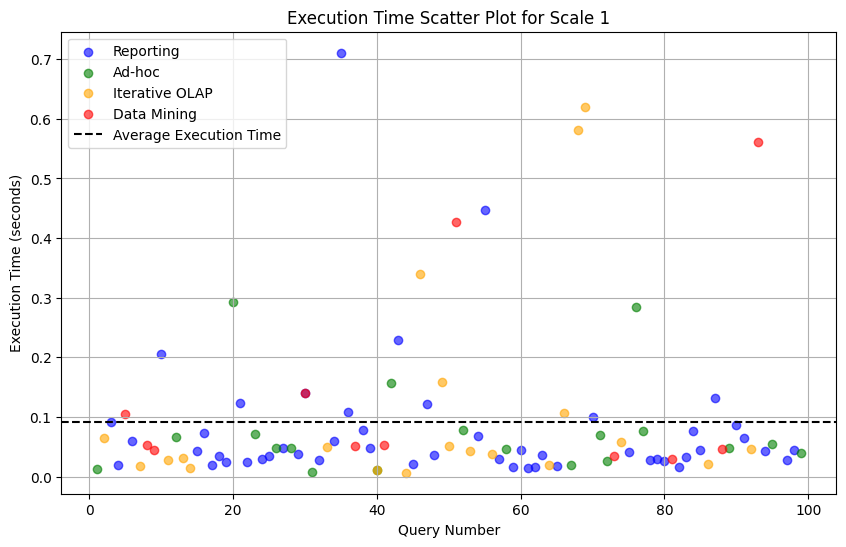

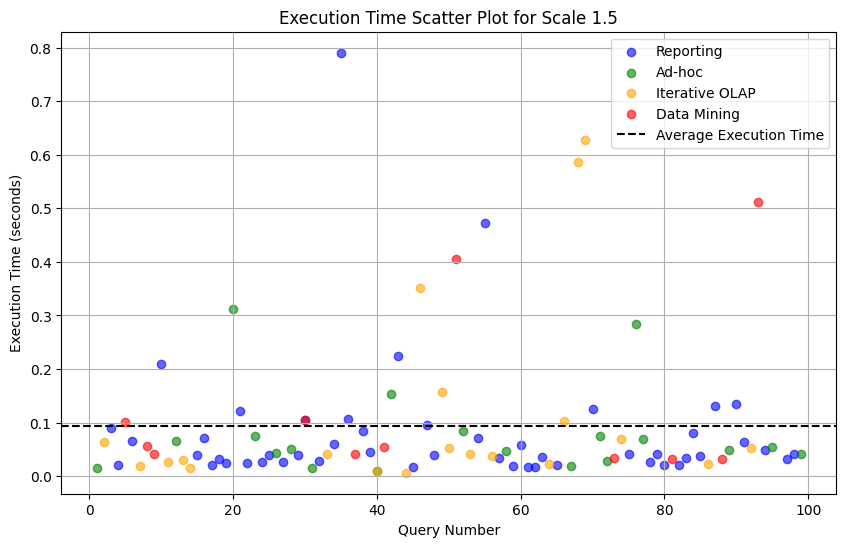

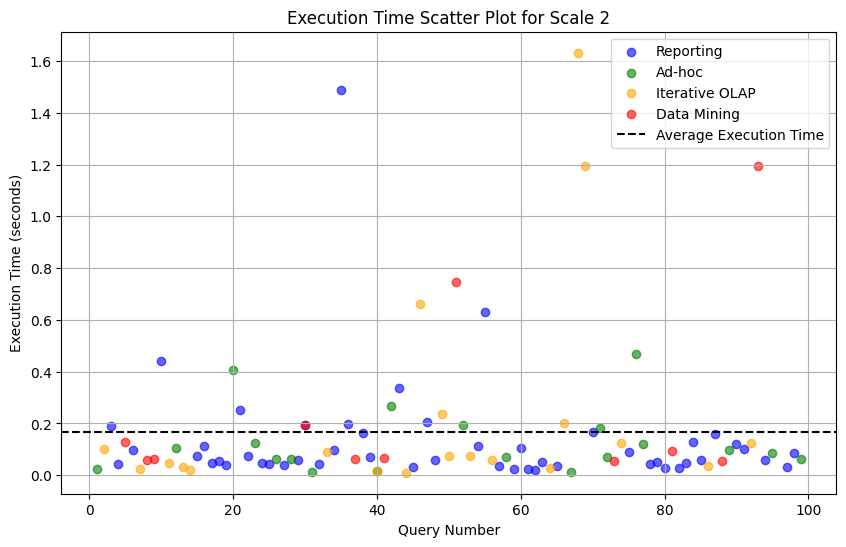

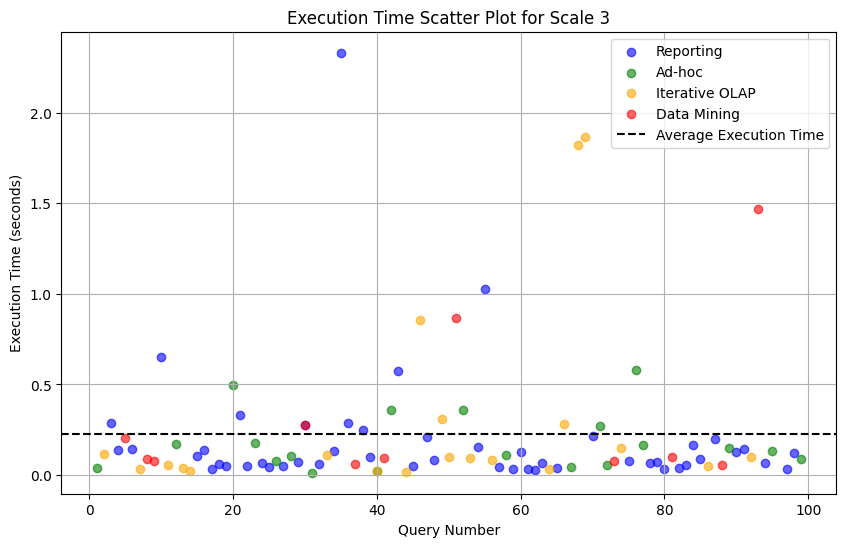

In [4]:
for scale, path in scale_paths.items():
    df = pd.read_csv(path)
    df['Query_Number'] = df['Query'].str.extract(r'query_(\d+)\.sql').astype(int)
    
    stats['Total Time'][scale] = df['Execution Time'].sum()
    stats['Longest Time'][scale] = df['Execution Time'].max()
    stats['Smallest Time'][scale] = df['Execution Time'].min()
    stats['Mean Time'][scale] = df['Execution Time'].mean()
    
    plt.figure(figsize=(10, 6))
    for group, query_numbers in groups.items():
        group_df = df[df['Query_Number'].isin(query_numbers)]
        plt.scatter(group_df['Query_Number'], group_df['Execution Time'], 
                    color=colors[group], label=group, alpha=0.6)
        all_data[(scale, group)] = {
            'Total Time': group_df['Execution Time'].sum(),
            'Average Time': group_df['Execution Time'].mean(),
            'Longest Time': group_df['Execution Time'].max(),
            'Smallest Time': group_df['Execution Time'].min(),
            'Median Time': group_df['Execution Time'].median()
        }
    
    plt.axhline(y=stats['Mean Time'][scale], linestyle='--', color = 'black', label=f"Average Execution Time")    
    plt.xlabel("Query Number")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Execution Time Scatter Plot for {scale}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Scatter_Plot_{scale}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [5]:
all_data_df = pd.DataFrame.from_dict(all_data, orient='index')
all_data_df

Total Time  Average Time  Longest Time  \
Scale 1   Reporting         3.933065      0.078661      0.710791   
          Ad-hoc            1.459454      0.076813      0.291966   
          Iterative OLAP    2.303989      0.115199      0.619918   
          Data Mining       1.546101      0.140555      0.561352   
Scale 1.5 Reporting         4.070796      0.081416      0.790564   
          Ad-hoc            1.489674      0.078404      0.312841   
          Iterative OLAP    2.329261      0.116463      0.626935   
          Data Mining       1.414455      0.128587      0.511657   
Scale 2   Reporting         6.747344      0.134947      1.486539   
          Ad-hoc            2.446135      0.128744      0.467211   
          Iterative OLAP    4.785798      0.239290      1.632241   
          Data Mining       2.723065      0.247551      1.194455   
Scale 3   Reporting         9.652013      0.193040      2.331433   
          Ad-hoc            3.411294      0.179542      0.580669   
          Iterative OLAP    6.160197      0.308010      1.868706   
          Data Mining       3.370819      0.306438      1.468256   

                          Smallest Time  Median Time  
Scale 1   Reporting            0.014769     0.042964  
          Ad-hoc               0.008198     0.048603  
          Iterative OLAP       0.006518     0.044512  
          Data Mining          0.029838     0.052866  
Scale 1.5 Reporting            0.016237     0.040215  
          Ad-hoc               0.009871     0.049604  
          Iterative OLAP       0.006219     0.040511  
          Data Mining          0.032434     0.053385  
Scale 2   Reporting            0.021710     0.065461  
          Ad-hoc               0.010809     0.086096  
          Iterative OLAP       0.009786     0.074727  
          Data Mining          0.054703     0.068332  
Scale 3   Reporting            0.025976     0.087743  
          Ad-hoc               0.012722     0.133858  
          Iterative OLAP       0.015838     0.096377  
          Data Mining          0.053361     0.093230

<Figure size 1000x600 with 0 Axes>

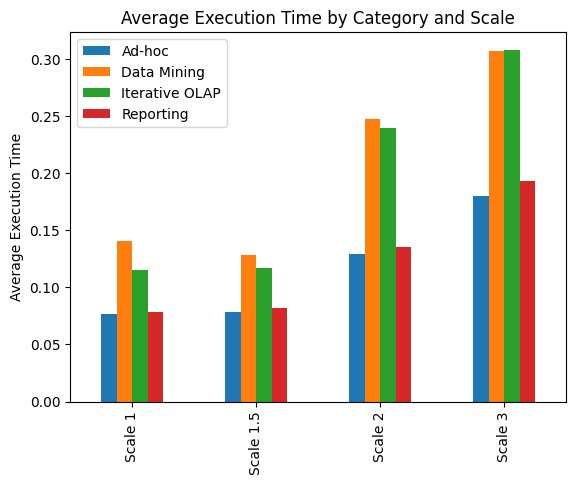

In [6]:
plt.figure(figsize=(10, 6))
all_data_df['Average Time'].unstack().plot(kind='bar', title='Average Execution Time by Category and Scale')
plt.ylabel('Average Execution Time')
plt.savefig("Average_Compare.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [29]:
all_data_df['Average Time']

Scale 1    Reporting         0.078661
           Ad-hoc            0.076813
           Iterative OLAP    0.115199
           Data Mining       0.140555
Scale 1.5  Reporting         0.081416
           Ad-hoc            0.078404
           Iterative OLAP    0.116463
           Data Mining       0.128587
Scale 2    Reporting         0.134947
           Ad-hoc            0.128744
           Iterative OLAP    0.239290
           Data Mining       0.247551
Scale 3    Reporting         0.193040
           Ad-hoc            0.179542
           Iterative OLAP    0.308010
           Data Mining       0.306438
Name: Average Time, dtype: float64

In [30]:
all_data_df['Median Time']

Scale 1    Reporting         0.042964
           Ad-hoc            0.048603
           Iterative OLAP    0.044512
           Data Mining       0.052866
Scale 1.5  Reporting         0.040215
           Ad-hoc            0.049604
           Iterative OLAP    0.040511
           Data Mining       0.053385
Scale 2    Reporting         0.065461
           Ad-hoc            0.086096
           Iterative OLAP    0.074727
           Data Mining       0.068332
Scale 3    Reporting         0.087743
           Ad-hoc            0.133858
           Iterative OLAP    0.096377
           Data Mining       0.093230
Name: Median Time, dtype: float64

<Figure size 1000x600 with 0 Axes>

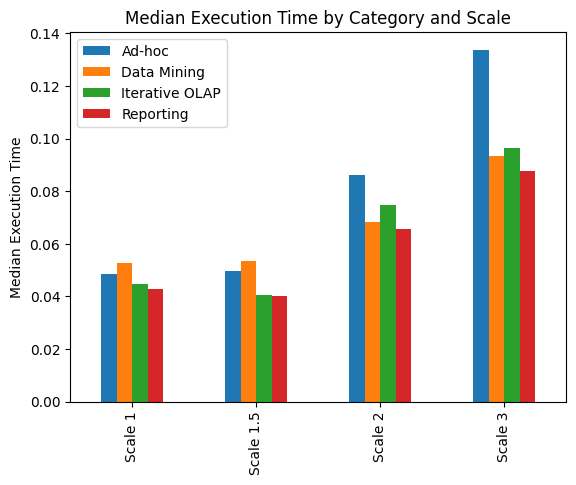

In [7]:
plt.figure(figsize=(10, 6))
all_data_df['Median Time'].unstack().plot(kind='bar', title='Median Execution Time by Category and Scale')
plt.ylabel('Median Execution Time')
plt.savefig("Median_Compare.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
#plt.figure(figsize=(10, 6))
#all_data_df['Smallest Time'].unstack().plot(kind='bar', title='Smallest Execution Time by Category and Scale')
#plt.ylabel('Smallest Execution Time')
#plt.show()

In [9]:
stats_df = pd.DataFrame.from_dict(stats)

In [10]:
stats_df

,Total Time,Longest Time,Smallest Time,Mean Time
Scale 1,9.109419,0.710791,0.006518,0.092014
Scale 1.5,9.210099,0.790564,0.006219,0.093031
Scale 2,16.514629,1.632241,0.009786,0.166814
Scale 3,22.322693,2.331433,0.012722,0.225482


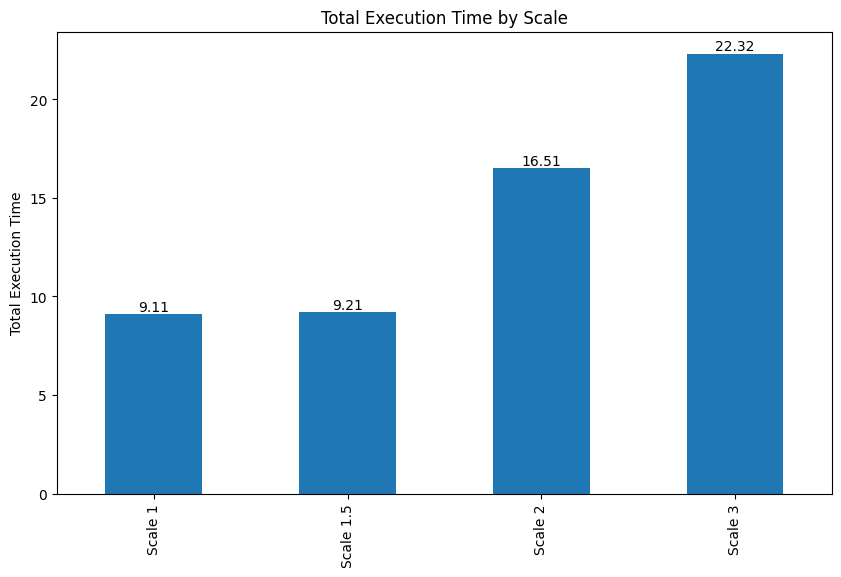

In [27]:
plt.figure(figsize=(10, 6))
bars = stats_df['Total Time'].plot(kind='bar', title='Total Execution Time by Scale')
plt.ylabel('Total Execution Time')

for i, value in enumerate(stats_df['Total Time']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.savefig("Power_Test.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [28]:
stats_df['Total Time']

Scale 1       9.109419
Scale 1.5     9.210099
Scale 2      16.514629
Scale 3      22.322693
Name: Total Time, dtype: float64

In [14]:
#plt.figure(figsize=(10, 6))
#stats_df['Smallest Time'].plot(kind='bar', title='Smallest Execution Time by scale')
#plt.ylabel('Smallest Execution Time')
#plt.show()

In [15]:
#plt.figure(figsize=(10, 6))
#stats_df['Longest Time'].plot(kind='bar', title='Longest Execution Time by scale')
#plt.ylabel('Longest Execution Time')
#plt.show()

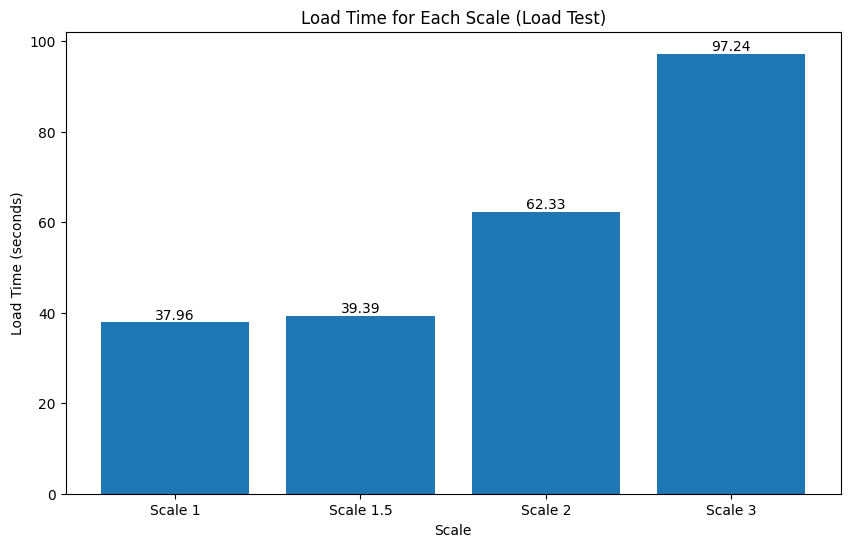

In [20]:
load_file_paths = {
    'Scale 1': 'results/load_test_s1.txt',
    'Scale 1.5': 'results/load_test_s1.5.txt',
    'Scale 2': 'results/load_test_s2.txt',
    'Scale 3': 'results/load_test_s3.txt'
}

load_times = {}
for scale, path in load_file_paths.items():
    with open(path, 'r') as file:        
        load_times[scale] = float(file.readline().strip())

plt.figure(figsize=(10, 6))
bars = plt.bar(load_times.keys(), load_times.values())
plt.xlabel("Scale")
plt.ylabel("Load Time (seconds)")
plt.title("Load Time for Each Scale (Load Test)")

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10, color='black')

plt.savefig("Load_test.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [21]:
load_times

{'Scale 1': 37.96003222465515,
 'Scale 1.5': 39.3855721950531,
 'Scale 2': 62.331023931503296,
 'Scale 3': 97.23845744132996}

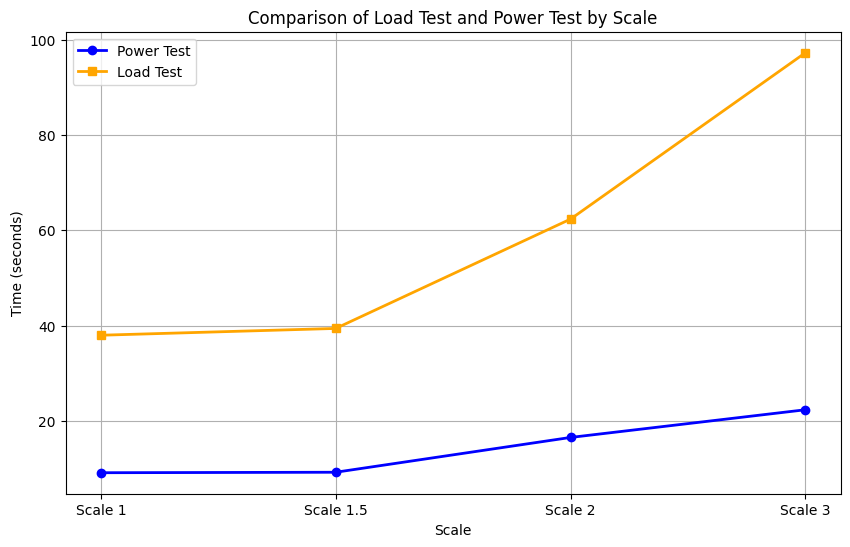

In [17]:
scales = list(stats['Total Time'].keys())  
power = [stats['Total Time'][scale] for scale in scales]  
load = [load_times[scale] for scale in scales]  

# Plotting
plt.figure(figsize=(10, 6))

# Line for Total Time with markers
plt.plot(scales, power, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Power Test')

# Line for Load Time with markers
plt.plot(scales, load, color='orange', marker='s', linestyle='-', linewidth=2, markersize=6, label='Load Test')

# Adding labels, title, legend, and grid
plt.xlabel("Scale")
plt.ylabel("Time (seconds)")
plt.title("Comparison of Load Test and Power Test by Scale")
plt.legend()
plt.grid(True)
plt.savefig("Load_power_compare.pdf", format="pdf", bbox_inches="tight")
plt.show()


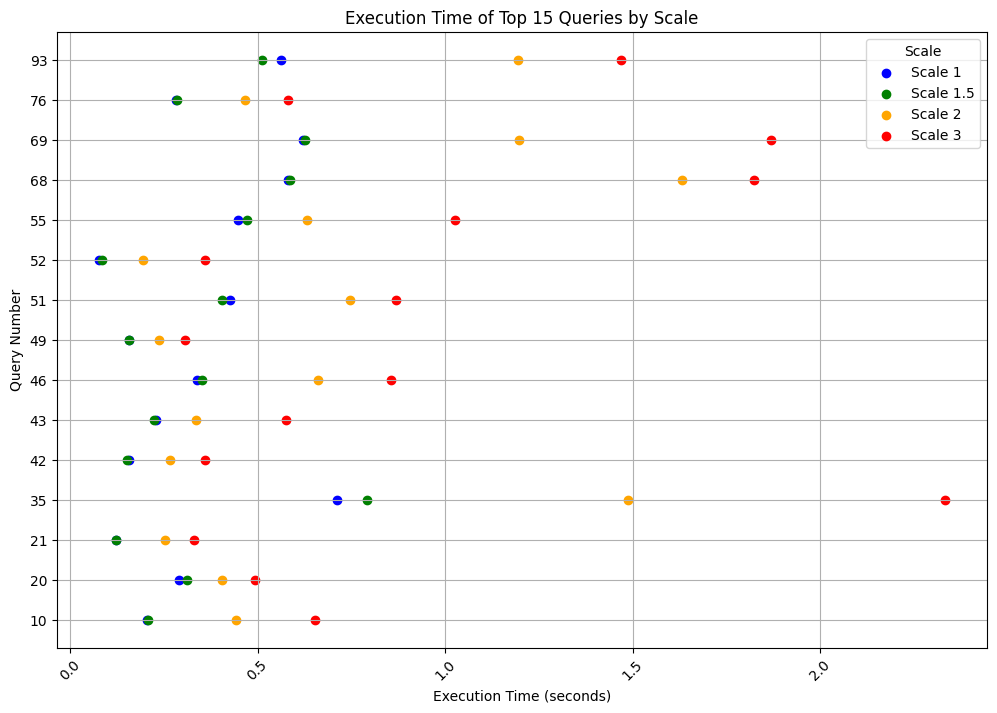

In [52]:
colors_scale = {
    'Scale 1': 'blue',
    'Scale 1.5': 'green',
    'Scale 2': 'orange',
    'Scale 3': 'red'
}

data = []

for scale, path in scale_paths.items():
    df = pd.read_csv(path)
    df['Scale'] = scale  
    df['Query'] = df['Query'].str.extract(r'query_(\d+)\.sql')[0].astype(int)  # Ensure correct extraction
    data.append(df)

combined_data = pd.concat(data)

total_execution_times = combined_data.groupby('Query')['Execution Time'].sum().reset_index()

top_queries = total_execution_times.sort_values(by='Execution Time', ascending=False).head(15)

top_combined_data = combined_data[combined_data['Query'].isin(top_queries['Query'])]

top_combined_data = top_combined_data.sort_values(by='Query')

plt.figure(figsize=(12, 8))

for scale in scale_paths.keys():
    scale_data = top_combined_data[top_combined_data['Scale'] == scale]
    plt.scatter(scale_data['Execution Time'], scale_data['Query'].astype(str), color=colors_scale[scale], label=scale, alpha=1)

plt.xlabel('Execution Time (seconds)')
plt.ylabel('Query Number')
plt.title('Execution Time of Top 15 Queries by Scale')
plt.xticks(rotation=45)  

plt.yticks(range(len(top_combined_data['Query'].unique())), top_combined_data['Query'].astype(str).unique())
plt.legend(title='Scale', loc='upper right')
plt.grid(True)

plt.savefig("Execution_Time_Top_Queries.pdf", format="pdf", bbox_inches="tight")
plt.show()
